In [3]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
diabetes = load_diabetes()
df = pd.DataFrame(data= diabetes.data, columns= diabetes.feature_names)
df["target"] = diabetes.target
df.head()

# sex was categorical and in preproccessing they changed it as numerical values!

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [6]:
df.shape

(442, 11)

In [11]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

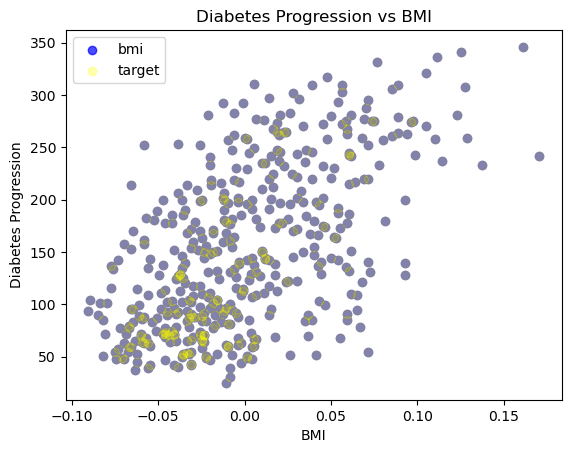

In [13]:
plt.scatter(df["bmi"], df["target"] , color="blue" , alpha=0.7, label="bmi")
plt.scatter(df["bmi"], df["target"] , color="yellow" , alpha=0.3, label="target")
plt.xlabel("BMI")
plt.ylabel("Diabetes Progression")
plt.title("Diabetes Progression vs BMI")
plt.legend()
plt.show()
# in this scatter we can see the positive correlation between BMI and target as well

<Axes: >

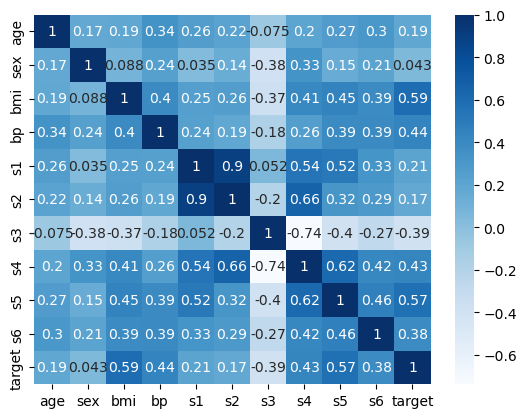

In [15]:
cm = df.corr()
sns.heatmap(cm , cmap="Blues", annot=True)

In [108]:
# split the data into train=80% and test=20%
# axis = 0 rows   ,    axis = 1 columns
x = df.drop("target", axis=1)
y = df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [118]:
print(x_train.shape, x_test.shape)
# so it means our splitting is fine!

(353, 10) (89, 10)


In [131]:
# modeling
model = LinearRegression()

In [136]:
model.fit(x_train, y_train)

LinearRegression()

In [201]:
y_pred = model.predict(x_test)
print(y_pred)
y_pred.shape

[139.5475584  179.51720835 134.03875572 291.41702925 123.78965872
  92.1723465  258.23238899 181.33732057  90.22411311 108.63375858
  94.13865744 168.43486358  53.5047888  206.63081659 100.12925869
 130.66657085 219.53071499 250.7803234  196.3688346  218.57511815
 207.35050182  88.48340941  70.43285917 188.95914235 154.8868162
 159.36170122 188.31263363 180.39094033  47.99046561 108.97453871
 174.77897633  86.36406656 132.95761215 184.53819483 173.83220911
 190.35858492 124.4156176  119.65110656 147.95168682  59.05405241
  71.62331856 107.68284704 165.45365458 155.00975931 171.04799096
  61.45761356  71.66672581 114.96732206  51.57975523 167.57599528
 152.52291955  62.95568515 103.49741722 109.20751489 175.64118426
 154.60296242  94.41704366 210.74209145 120.2566205   77.61585399
 187.93203995 206.49337474 140.63167076 105.59678023 130.70432536
 202.18534537 171.13039501 164.91423047 124.72472569 144.81030894
 181.99635452 199.41369642 234.21436188 145.95665512  79.86703276
 157.369412

(89,)

In [197]:
print("mean_squared_error :", mean_squared_error(y_test, y_pred)) 
print("mean_absolute_error :", mean_absolute_error(y_test, y_pred)) 
print("r2 score:", r2_score(y_test, y_pred))

mean_squared_error : 2900.1936284934804
mean_absolute_error : 42.79409467959993
r2 score: 0.4526027629719196


In [185]:
# Coefficients of the model
coefficients = pd.DataFrame({"Feature": x.columns, "Coefficient": model.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print(coefficients)

  Feature  Coefficient
8      s5   736.198859
2     bmi   542.428759
5      s2   518.062277
3      bp   347.703844
7      s4   275.317902
6      s3   163.419983
9      s6    48.670657
0     age    37.904021
1     sex  -241.964362
4      s1  -931.488846


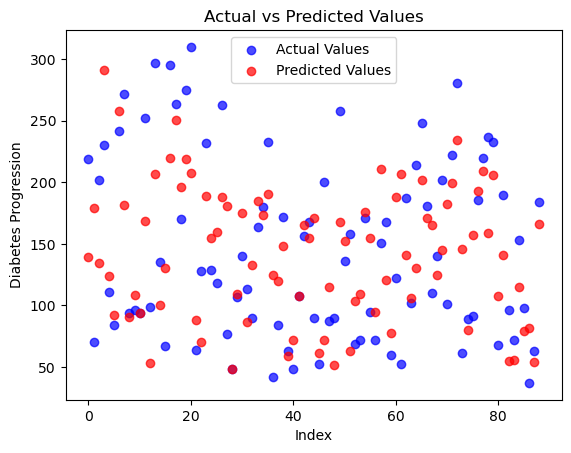

In [183]:
plt.scatter(range(len(y_test)), y_test, color="blue", alpha=0.7, label="Actual Values")
plt.scatter(range(len(y_pred)), y_pred, color="red", alpha=0.7, label="Predicted Values")
plt.xlabel("Index (test)")
plt.ylabel("Diabetes Progression")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()